Exploratory Principal Component Analysis for Kaggle Ames Iowa Housing Prices Competition

Libraries necessary for the work

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(font_scale=1.2) #adopting James' convention

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import pylab 
import scipy.stats as stats
from copy import deepcopy

import sklearn.model_selection as ms
from scipy.stats import skew
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import cross_val_score

In [2]:
seed = 0;

In [3]:
# Read in train and test sets
X_train = pd.read_csv('Datasets/stack_trainx.csv');
X_test = pd.read_csv('Datasets/stack_testx.csv');
y_tr = pd.read_csv('Datasets/stack_trainy.csv');
y_train = y_tr.SalePrice.tolist()
# must log x-form the data
y_train = np.array(y_train)
y_train = np.log1p(y_train)

In [4]:
X_train_v, X_test_v, y_train_v, y_test_v =\
    ms.train_test_split(deepcopy(X_train),\
                        deepcopy(y_train),\
                        test_size = 1/8,\
                        random_state = seed)

In [67]:
def rmse(y_predicted, y_actual):
    return( np.sqrt( mean_squared_error(y_actual, y_predicted) ) )


def R2(y_predicted, y_actual):
    # R^2 = 1 - SS_residual / SS_total
    SS_residual = sum((y_predicted - y_actual)**2)
    SS_total = sum((y_actual - y_actual.mean())**2)
    R2 = 1 - SS_residual / SS_total
    return(R2)

In [5]:
X_train_v.shape

(1277, 273)

In [6]:
len(y_train_v)

1277

In [7]:
y_train_v

array([12.63134365, 11.32056569, 12.07254697, ..., 11.62626308,
       12.36308067, 12.30592251])

In [8]:
X_train_v.shape

(1277, 273)

In [9]:
X_train_v.head()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,...,SaleCondition_nan,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleType_nan
27,7.441320,0.000000,3.0,7.105786,0.000000,0.693147,0.000000,6.188264,0.0,0.693147,...,0,0,0,0,0,0,0,0,1,0
308,6.759255,0.000000,1.0,5.572154,0.000000,0.000000,0.000000,6.396930,0.0,0.000000,...,0,0,0,0,0,0,0,0,1,0
298,6.948897,6.555357,3.0,5.953243,5.170484,0.000000,0.693147,4.969813,0.0,0.693147,...,0,0,0,0,0,0,0,0,1,0
227,6.182085,6.224558,2.0,5.774552,0.000000,0.000000,0.000000,5.093750,0.0,0.000000,...,0,0,0,0,0,0,0,0,1,0
1021,7.107425,0.000000,2.0,6.529419,0.000000,0.693147,0.000000,6.246107,0.0,0.000000,...,0,0,0,0,0,0,1,0,0,0


In [10]:
X_train.max()
X_train.isnull().values.any()

False

In [11]:
X_pca_train_v = RobustScaler().fit_transform(X_train_v)

In [12]:
X_pca_test_v = RobustScaler().fit_transform(X_test_v)

In [13]:
type(X_pca_train_v)

numpy.ndarray

In [14]:
pca_train = PCA(n_components=100).fit(X_pca_train_v)

In [15]:
pca_test = PCA(n_components=100).fit(X_pca_test_v)

In [17]:
X_train_v = pca_train.transform(X_pca_train_v)
X_test_v = pca_test.transform(X_pca_test_v)

In [ ]:
var_train=np.cumsum(np.round(pca_train.explained_variance_ratio_, decimals=4)*100)

In [ ]:
plt.plot(var_train)
plt.ylabel('% Explained Variance in Data Set')
plt.xlabel('Number of Components')
plt.title('Amount of Variance Explained per Component')
plt.show()

In [23]:
def component_results(data, pca):
    modes = ['Mode {}'.format(i) for i in range(1,len(pca.components_) + 1)]
    components = pd.DataFrame(np.round(pca.components_,4), columns = data.dtype.names)
    components.index = modes
    # variance explained
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = modes
    
    # too many modes currently for plot to be useful
    # Plot the feature weights as a function of the components
    # components.plot(ax = ax, kind = 'bar')
    # ax.set_ylabel("Feature Weights") 
    # ax.set_xticklabels(modes, rotation=0)
    
    # Display the explained variance ratios# 
    # for i, ev in enumerate(pca.explained_variance_ratio_): 
        # ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n %.4f"%(ev))
    
    # Display the explained variance ratios
    # for i, ev in enumerate(pca.explained_variance_ratio_): 
        # ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n %.4f"%(ev))
    
    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis = 1)

In [24]:
component_results = component_results(X_train_v, pca_train)

In [ ]:
# component_results.to_csv('./Datasets/eigenvectors.csv')

In [25]:
component_results.iloc[0:100,0].cumsum()

Mode 1      0.1782
Mode 2      0.2829
Mode 3      0.3720
Mode 4      0.4398
Mode 5      0.4970
Mode 6      0.5428
Mode 7      0.5838
Mode 8      0.6202
Mode 9      0.6484
Mode 10     0.6725
Mode 11     0.6917
Mode 12     0.7101
Mode 13     0.7251
Mode 14     0.7396
Mode 15     0.7511
Mode 16     0.7619
Mode 17     0.7719
Mode 18     0.7811
Mode 19     0.7892
Mode 20     0.7970
Mode 21     0.8042
Mode 22     0.8109
Mode 23     0.8173
Mode 24     0.8236
Mode 25     0.8296
Mode 26     0.8351
Mode 27     0.8404
Mode 28     0.8455
Mode 29     0.8504
Mode 30     0.8551
             ...  
Mode 71     0.9574
Mode 72     0.9585
Mode 73     0.9596
Mode 74     0.9607
Mode 75     0.9617
Mode 76     0.9627
Mode 77     0.9637
Mode 78     0.9647
Mode 79     0.9657
Mode 80     0.9666
Mode 81     0.9675
Mode 82     0.9683
Mode 83     0.9691
Mode 84     0.9699
Mode 85     0.9707
Mode 86     0.9715
Mode 87     0.9723
Mode 88     0.9730
Mode 89     0.9737
Mode 90     0.9744
Mode 91     0.9751
Mode 92     

In [ ]:
#Explained variance
plt.plot(pca.explained_variance_ratio_, 'ro')
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.show()

In [27]:
pca_train.components_

array([[-1.28107380e-01, -1.55500109e-04, -2.24766883e-02, ...,
         3.33963378e-04,  2.65378089e-02, -0.00000000e+00],
       [ 4.36505873e-02,  9.36228298e-03, -3.54066199e-02, ...,
        -3.22559981e-04, -2.37405719e-02, -0.00000000e+00],
       [ 8.84226076e-02, -5.56191548e-02, -7.33979107e-03, ...,
        -1.58673940e-04,  6.85138847e-03,  0.00000000e+00],
       ...,
       [-4.24790604e-02,  6.37248280e-02,  8.35943070e-03, ...,
        -7.29027506e-03,  5.93256346e-02,  0.00000000e+00],
       [ 1.83140132e-02, -1.79704730e-02, -5.96535662e-02, ...,
         1.56093374e-02, -3.49602017e-01,  0.00000000e+00],
       [ 2.29948590e-02,  1.74650773e-02, -7.77125470e-02, ...,
         5.53433635e-04,  5.55987787e-02,  0.00000000e+00]])

Now, let's try to apply Linear, Ridge, and Lasso Models

In [28]:
# develop test of rmse to compare across models
def rmse_cv(model):
    rmse = np.sqrt( -cross_val_score(model, X_train_v, y_train_v, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [30]:
houseRegr = LinearRegression()

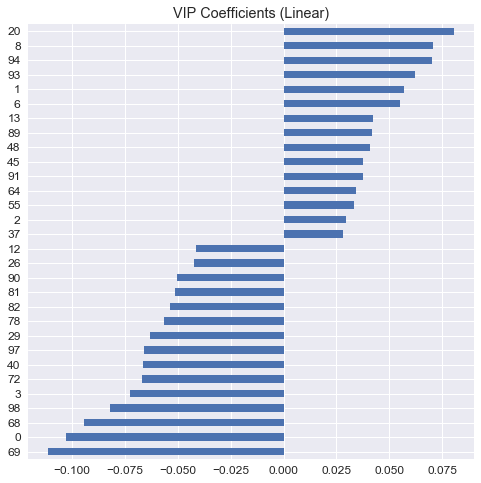

In [31]:
model_lin = houseRegr.fit(X_train_v, y_train_v);
coeffs_lin = pd.Series(model_lin.coef_, index = X_train_v.dtype.names);
vip_coeffs_lin = pd.concat([coeffs_lin.sort_values().head(15),
                              coeffs_lin.sort_values().tail(15)])

fig, ax = plt.subplots(figsize=(8,8));
vip_coeffs_lin.plot(kind = "barh");
plt.title("VIP Coefficients (Linear)");

In [38]:
np.mean(rmse_cv(model_lin))

0.13381886536435023

**************************************************
Linear Performance: R^2 = 0.9131
**************************************************


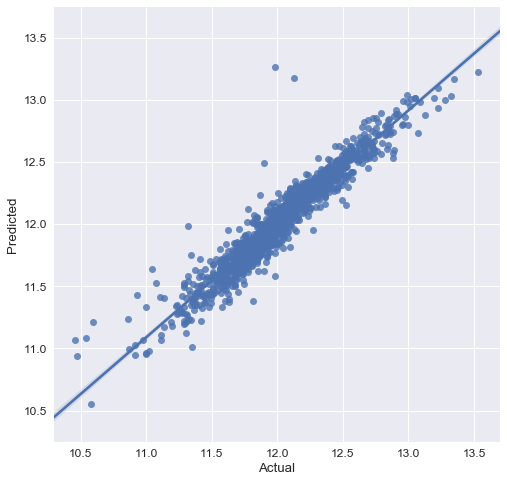

In [34]:
predictions_lin = pd.DataFrame({"Predicted":model_lin.predict(X_train_v), 
                                  "Actual":y_train_v});
predictions_lin["Residual"] = predictions_lin.Actual - predictions_lin.Predicted;


print('*'*50)
print('Linear Performance: R^2 = {:.4f}'.format(model_lin.score(X_train_v, y_train_v)))
print('*'*50)


fig, ax = plt.subplots(figsize=(8,8));
sns.regplot(predictions_lin.Actual, predictions_lin.Predicted);

**************************************************
Linear Test Performace: R^2 = 0.0545
**************************************************
Linear Test Performace: RMSE = 0.3525
**************************************************


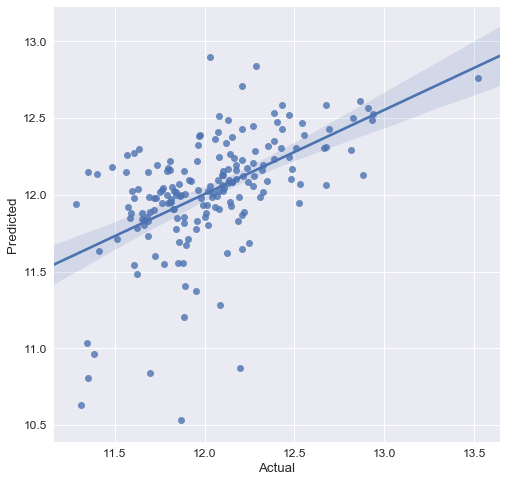

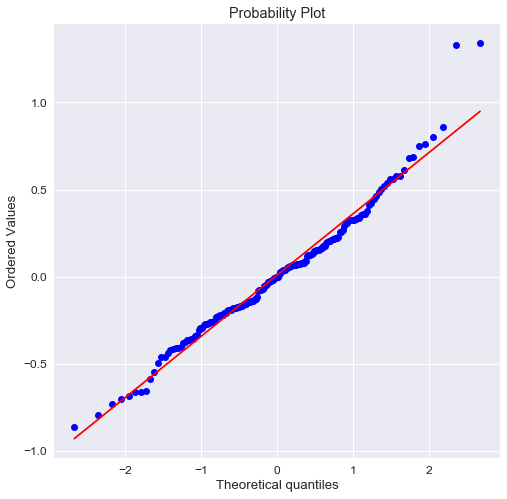

In [73]:
# Test Performance
# The results are put in dataframe "predictions_Ridge_test"

predictions_lin_test = pd.DataFrame({"Predicted":model_lin.predict(X_test_v), 
                                  "Actual":y_test_v});
predictions_lin_test["Residual"] = predictions_lin_test.Actual - predictions_lin_test.Predicted;

print('*'*50)
print('Linear Test Performace: R^2 = {:.4f}'.format(model_lin.score(X_test_v, y_test_v)))
print('*'*50)
print('Linear Test Performace: RMSE = {:.4f}'.format(rmse(predictions_lin_test.Actual, predictions_lin_test.Predicted)))
print('*'*50)

fig, ax = plt.subplots(figsize=(8,8));
sns.regplot(predictions_lin_test.Actual, predictions_lin_test.Predicted);
#ax.set_title('')

fig, ax = plt.subplots(figsize=(8,8));
stats.probplot(predictions_lin_test.Residual, dist="norm", plot=pylab);
pylab.show();

In [39]:
model_Ridge = Ridge()

In [40]:
# keeping parameters same as James
# supply a log-ranged alphas from 10^(-2) to 10^(2)
# total: 60 alphas to do CV
alpha_array = np.logspace(-1,2,64)

cv_Ridge = [rmse_cv(Ridge(alpha = Alpha)).mean() for Alpha in alpha_array]

**************************************************
Ridge CV:
Minumum RMSE 0.1316 
achieved at alpha = 21.5443
**************************************************


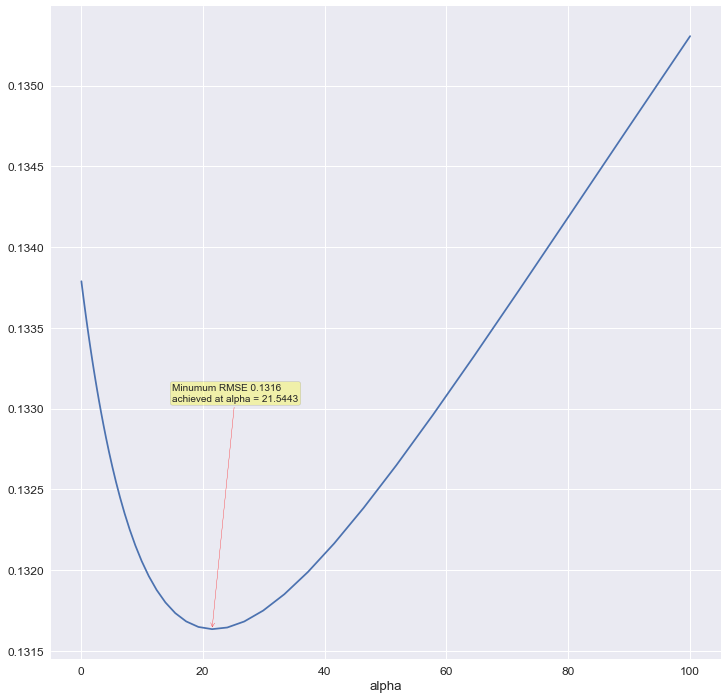

In [41]:
cv_Ridge = pd.Series(cv_Ridge, index = alpha_array)

fig, ax = plt.subplots(figsize=(12,12));
ax.plot(alpha_array,cv_Ridge);
ax.set_xlabel('alpha')
#ax.set_ylabel('RMSE')
alpha0 = cv_Ridge[cv_Ridge == cv_Ridge.min()].index[0];
rmse0 = cv_Ridge.min();
s = 'Minumum RMSE {:.4f} \nachieved at alpha = {:.4f}'.format(rmse0,alpha0)
ax.annotate(s, xy=(alpha0, rmse0),
               xycoords='data',
               xytext=(alpha_array.mean(), cv_Ridge.mean()),
               #textcoords='offset points',
               bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3),
               arrowprops=dict(arrowstyle='->',color='red'))

print('*'*50)
print('Ridge CV:')
print(s)
print('*'*50)

In [43]:
len(X_train_v)

1277

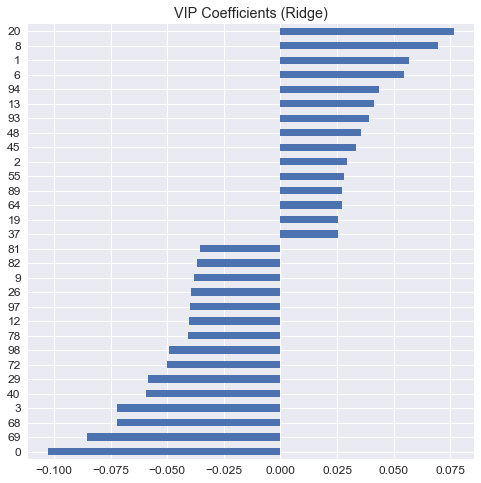

In [47]:
model_Ridge = Ridge(alpha0).fit(X_train_v, y_train_v);
coeffs_Ridge = pd.Series(model_Ridge.coef_, index = X_train_v.dtype.names);
vip_coeffs_Ridge = pd.concat([coeffs_Ridge.sort_values().head(15),
                              coeffs_Ridge.sort_values().tail(15)])

fig, ax = plt.subplots(figsize=(8,8));
vip_coeffs_Ridge.plot(kind = "barh");
plt.title("VIP Coefficients (Ridge)");

**************************************************
Ridge Performace: R^2 = 0.9113
**************************************************


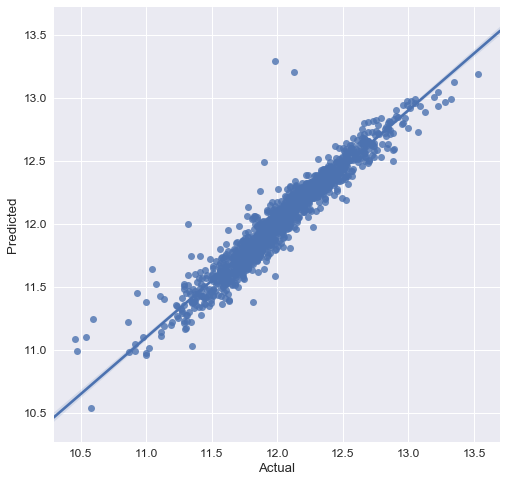

In [48]:
predictions_Ridge = pd.DataFrame({"Predicted":model_Ridge.predict(X_train_v), 
                                  "Actual":y_train_v});
predictions_Ridge["Residual"] = predictions_Ridge.Actual - predictions_Ridge.Predicted;


print('*'*50)
print('Ridge Performance: R^2 = {:.4f}'.format(model_Ridge.score(X_train_v, y_train_v)))
print('*'*50)


fig, ax = plt.subplots(figsize=(8,8));
sns.regplot(predictions_Ridge.Actual, predictions_Ridge.Predicted);

**************************************************
Ridge Test Performace: R^2 = 0.0751
**************************************************
Ridge Test Performace: RMSE = 0.3486
**************************************************


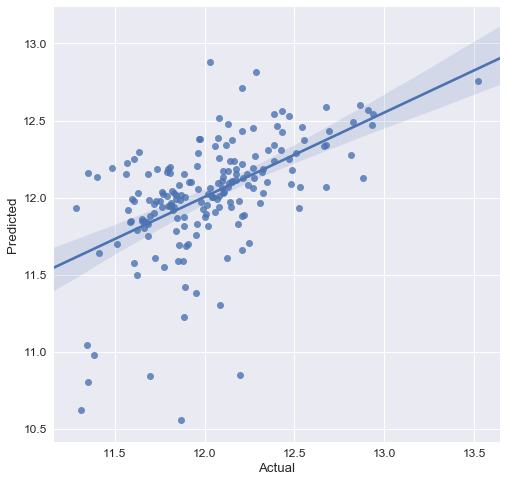

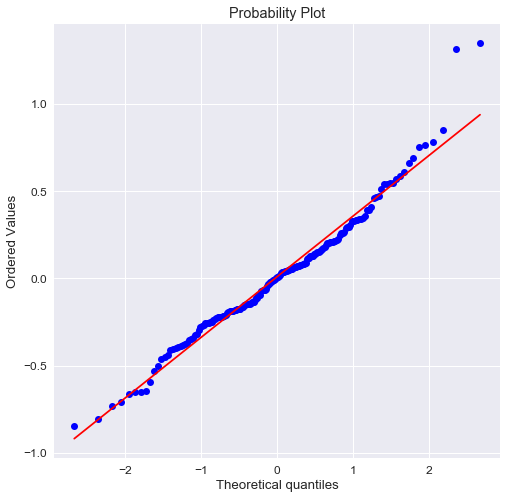

In [69]:
# Evaluating Test Performance
# Test Performance
# The results are put in dataframe "predictions_Ridge_test"

predictions_Ridge_test = pd.DataFrame({"Predicted":model_Ridge.predict(X_test_v), 
                                       "Actual":y_test_v});
predictions_Ridge_test["Residual"] = predictions_Ridge_test.Actual - predictions_Ridge_test.Predicted;


print('*'*50)
print('Ridge Test Performance: R^2 = {:.4f}'.format(model_Ridge.score(X_test_v, y_test_v)))
print('*'*50)
print('Ridge Test Performance: RMSE = {:.4f}'.format(rmse(predictions_Ridge_test.Actual, predictions_Ridge_test.Predicted)))
print('*'*50)

fig, ax = plt.subplots(figsize=(8,8));
sns.regplot(predictions_Ridge_test.Actual, predictions_Ridge_test.Predicted);
#ax.set_title('')

fig, ax = plt.subplots(figsize=(8,8));
stats.probplot(predictions_Ridge_test.Residual, dist="norm", plot=pylab);
pylab.show();
#ax.set_title('')

In [49]:
model_Lasso = Lasso()
# supply a log-ranged alphas from 10^(-2) to 10^(2)
# total: 60 alphas to do CV
alpha_array = np.logspace(-4,-2,256)

cv_Lasso = [rmse_cv(Lasso(alpha = Alpha)).mean() for Alpha in alpha_array]

In [50]:
len(y_train_v)

1277

**************************************************
Lasso CV:
Minumum RMSE 0.1321 
achieved at alpha = 0.0006
**************************************************


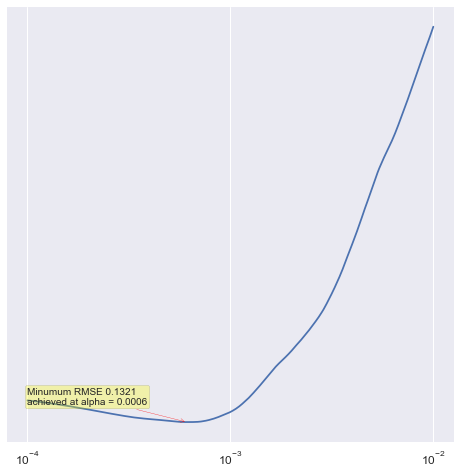

In [51]:
cv_Lasso = pd.Series(cv_Lasso, index = alpha_array)

fig, ax = plt.subplots(figsize=(8,8));
ax.loglog(alpha_array,cv_Lasso);
plt.grid(True);

alpha0 = cv_Lasso[cv_Lasso == cv_Lasso.min()].index[0];
rmse0 = cv_Lasso.min();
s = 'Minumum RMSE {:.4f} \nachieved at alpha = {:.4f}'.format(rmse0,alpha0)
ax.annotate(s, xy=(alpha0, rmse0),
               xycoords='data',
               xytext=(0.0001, 0.133),
               #textcoords='offset points',
               bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3),
               arrowprops=dict(arrowstyle='->',color='red'))

print('*'*50)
print('Lasso CV:')
print(s)
print('*'*50)

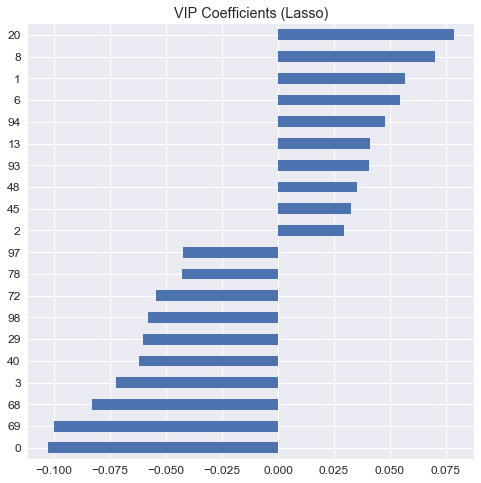

In [52]:
model_Lasso = Lasso(alpha0).fit(X_train_v, y_train_v);


coeffs_Lasso = pd.Series(model_Lasso.coef_, index = X_train_v.dtype.names);
vip_coeffs_Lasso = pd.concat([coeffs_Lasso.sort_values().head(10),
                              coeffs_Lasso.sort_values().tail(10)])

fig, ax = plt.subplots(figsize=(8,8));
vip_coeffs_Lasso.plot(kind = "barh");
plt.title("VIP Coefficients (Lasso)");

**************************************************
Lasso Performance: R^2 = 0.9106
**************************************************


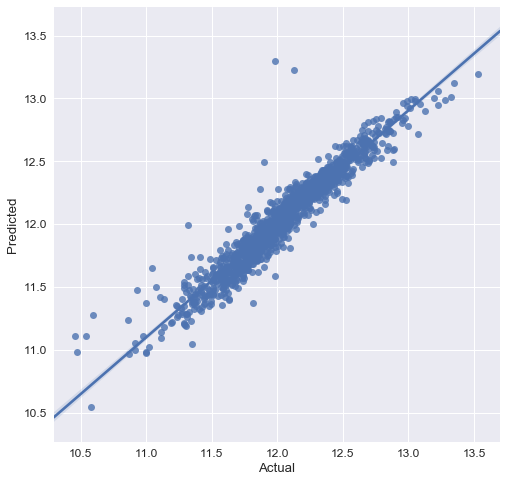

In [84]:
predictions_Lasso_train = pd.DataFrame({"Predicted":model_Lasso.predict(X_train_v), 
                                  "Actual":y_train_v});
predictions_Lasso_train["Residual"] = predictions_Lasso_train.Actual - predictions_Lasso_train.Predicted;


print('*'*50)
print('Lasso Performance: R^2 = {:.4f}'.format(model_Lasso.score(X_train_v, y_train_v)))
print('*'*50)


fig, ax = plt.subplots(figsize=(8,8));
sns.regplot(predictions_Lasso_train.Actual, predictions_Lasso_train.Predicted);
#ax.set_title('')

**************************************************
Ridge Test Performance: R^2 = 0.0729
**************************************************
Ridge Test Performance: RMSE = 0.3486
**************************************************


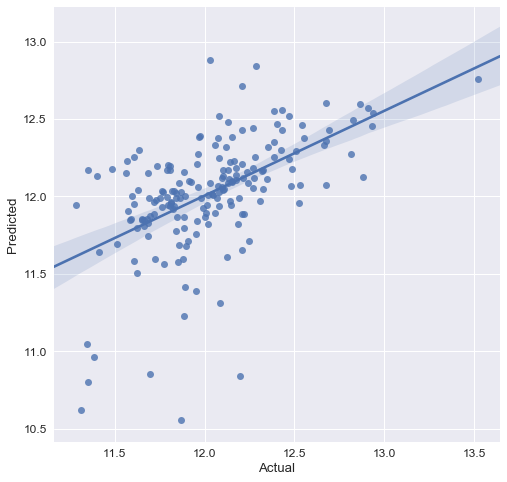

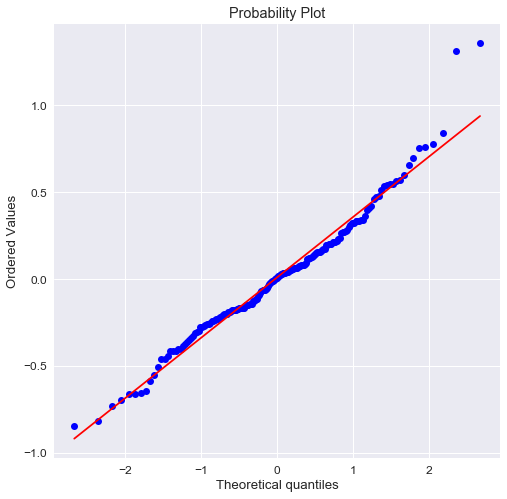

In [85]:
# Evaluating Test Performance
# Test Performance
# The results are put in dataframe "predictions_Ridge_test"

predictions_Lasso_test = pd.DataFrame({"Predicted":model_Lasso.predict(X_test_v), 
                                       "Actual":y_test_v});
predictions_Lasso_test["Residual"] = predictions_Lasso_test.Actual - predictions_Lasso_test.Predicted;


print('*'*50)
print('Lasso Test Performance: R^2 = {:.4f}'.format(model_Lasso.score(X_test_v, y_test_v)))
print('*'*50)
print('Lasso Test Performance: RMSE = {:.4f}'.format(rmse(predictions_Lasso_test.Actual, predictions_Ridge_test.Predicted)))
print('*'*50)

fig, ax = plt.subplots(figsize=(8,8));
sns.regplot(predictions_Lasso_test.Actual, predictions_Lasso_test.Predicted);
#ax.set_title('')

fig, ax = plt.subplots(figsize=(8,8));
stats.probplot(predictions_Lasso_test.Residual, dist="norm", plot=pylab);
pylab.show();
#ax.set_title('')

Let's try elastic net

In [54]:
l1_search = np.arange(0.01, 0.99, step = 0.05)
model_elasticGrid = ElasticNetCV(l1_ratio = l1_search, n_alphas=100, cv =10).fit(X_train_v, y_train_v);

In [55]:
l1_rat = model_elasticGrid.l1_ratio_
l1_rat

0.9600000000000001

In [56]:
alphaCV = model_elasticGrid.alpha_
alphaCV

0.0008703104770751276

In [57]:
model_elasticGrid.score(X_train_v, y_train_v)

0.9088617672507762

In [59]:
rmse_cv(model_elasticGrid).mean()

0.13238686270606642

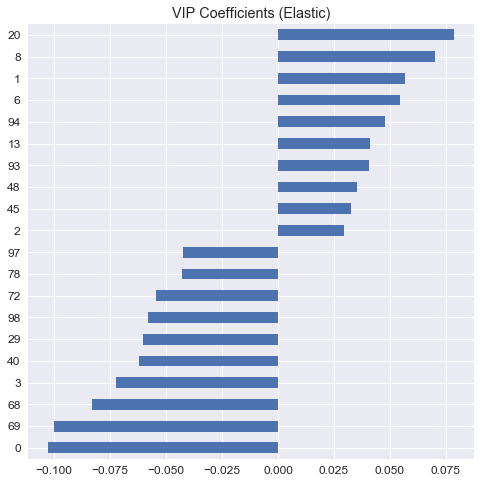

In [62]:
model_elasticNet = ElasticNet(l1_ratio = l1_rat, alpha = alphaCV).fit(X_train_v, y_train_v);


coeffs_elastic = pd.Series(model_elasticGrid.coef_, index = X_train_v.dtype.names);
vip_coeffs_elastic = pd.concat([coeffs_elastic.sort_values().head(10),
                              coeffs_elastic.sort_values().tail(10)])

fig, ax = plt.subplots(figsize=(8,8));
vip_coeffs_Lasso.plot(kind = "barh");
plt.title("VIP Coefficients (Elastic)");

**************************************************
Elastic Performace: R^2 = 0.9089
**************************************************


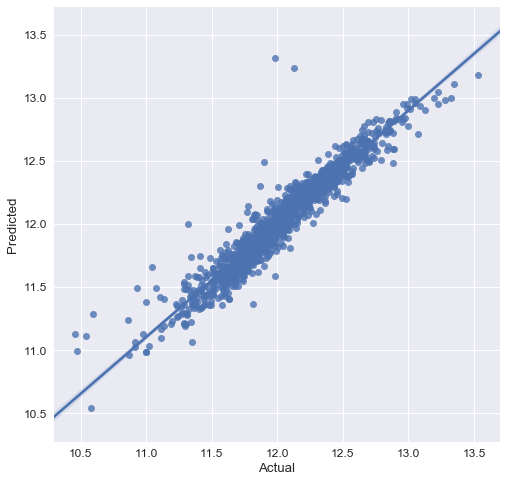

**************************************************
Elastic Net Performace: R^2 = 0.0793
**************************************************
Elastic Net Performace: RMSE = 0.3478
**************************************************


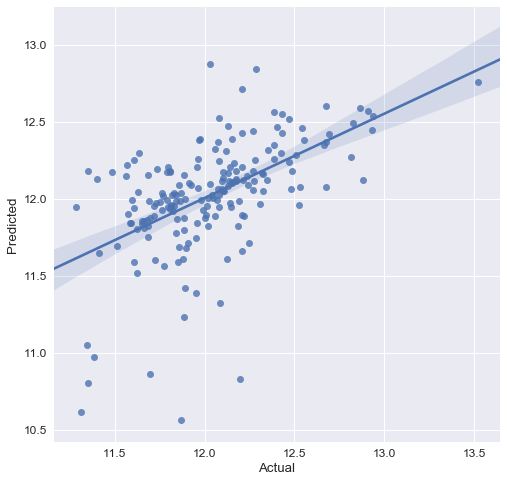

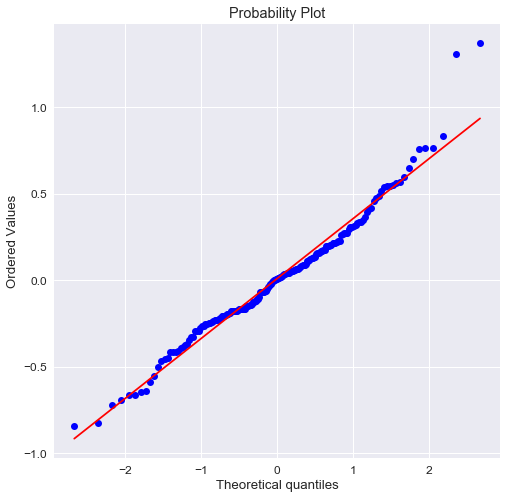

In [86]:
# Test Performance
# The results are put in dataframe "predictions_Ridge_test"
model_elasticNet

predictions_elastic_test = pd.DataFrame({"Predicted":model_elasticNet.predict(X_test_v), 
                                       "Actual":y_test_v});
predictions_elastic_test["Residual"] = predictions_elastic_test.Actual - predictions_elastic_test.Predicted;


print('*'*50)
print('Elastic Net Performace: R^2 = {:.4f}'.format(model_elasticNet.score(X_test_v, y_test_v)))
print('*'*50)
print('Elastic Net Performace: RMSE = {:.4f}'.format(rmse(predictions_elastic_test.Actual, predictions_elastic_test.Predicted)))
print('*'*50)

fig, ax = plt.subplots(figsize=(8,8));
sns.regplot(predictions_elastic_test.Actual, predictions_elastic_test.Predicted);
#ax.set_title('')

fig, ax = plt.subplots(figsize=(8,8));
stats.probplot(predictions_elastic_test.Residual, dist="norm", plot=pylab);
pylab.show();

Elastic has lower RMSE than either Ridge or Lasso, but R^2 is the same as Lasso and less than Ridge. 
VIP coefficients indistinguishable from Ridge

Employing XGBoost

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import xgboost

 xgboost.XGBRegressor(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, objective='reg:linear', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

In [173]:
xgbReg = xgboost.XGBRegressor(
    n_estimators=105,
    learning_rate = 0.0999,
    max_depth=3,  
    silent=True, 
    objective='reg:linear', 
    booster='gbtree', 
    n_jobs=6, 
    nthread=None, 
    gamma=0.6, 
    min_child_weight=5, 
    max_delta_step=0, 
    subsample=0.3, 
    colsample_bytree=0.3, 
    colsample_bylevel=1, 
    reg_alpha = 0.01,
    reg_lambda=1.5, 
    scale_pos_weight=1, 
    base_score=0.5, 
    random_state=0, 
    seed=seed, 
    missing=None)

There are in general two ways that you can control overfitting in xgboost

The first way is to directly control model complexity 

This include max_depth, min_child_weight and gamma

The second way is to add randomness to make training robust to noise

This include subsample, colsample_bytree


In [181]:
# Initial fitting considerations
# 'learning_rate':[0.06, 0.08, 0.1, 0.12, 0.14], best was 0.0999
# 'gamma': np.arange(0.1,1,0.1), best was 0.08
# 'reg_alpha' :[0.001, 0.01, 0.1, 1], best was 0.01
# 'n_estimators':np.arange(50,2000,5), best was 105

# Addressing overfitting
# max_depth = np.arange(1,50,1)
# min_child_weight = np.arange(0.1,10,0.1)
# reg_lambda = np.arange(1,50,1)

xgb_parameters = {
                 'reg_lambda': np.arange(1,10,0.1)
                  }

xgb_GridSearch = GridSearchCV(xgbReg, param_grid=xgb_parameters)

xgb_GridSearch.fit(X_train_v, y_train_v)

GridSearchCV(cv=None, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0.6, learning_rate=0.0999,
       max_delta_step=0, max_depth=3, min_child_weight=5, missing=None,
       n_estimators=100, n_jobs=6, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=0.01, reg_lambda=0, scale_pos_weight=1,
       seed=0, silent=True, subsample=0.3),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'reg_lambda': array([1. , 1.1, ..., 9.8, 9.9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [182]:
xgb_GridSearch.best_score_

0.795324524843281

In [183]:
#learning_rate0 = xgb_GridSearch.best_params_['learning_rate'];
# n_estimators0 = xgb_GridSearch.best_params_['n_estimators'];
# reg_alpha0 = xgb_GridSearch.best_params_['reg_alpha'];
# gamma0 = xgb_GridSearch.best_params_['gamma'];
reg_lambda0 = xgb_GridSearch.best_params_['reg_lambda'];

In [156]:
# max_depth0 = xgb_GridSearch.best_params_['max_depth'];
# min_child_weight0 = xgb_GridSearch.best_params_['min_child_weight'];

In [157]:
max_depth0

25

In [159]:
min_child_weight0

2.1

In [138]:
learning_rate0

0.09999999999999999

In [147]:
n_estimators0

105

In [111]:
reg_alpha0 

0.001

In [184]:
reg_lambda0 

1.5000000000000004

In [168]:
gamma0

0.6

In [185]:
# learning_rate=learning_rate0
# reg_alpha=reg_alpha0

model_xgb = xgboost.XGBRegressor(reg_lambda = reg_lambda0)

model_xgb = model_xgb.fit(X_train_v, y_train_v);

In [186]:
def rmse(y_predicted, y_actual):
    return( np.sqrt( mean_squared_error(y_actual, y_predicted) ) )

def R2(y_predicted, y_actual):
    # R^2 = 1 - SS_residual / SS_total
    SS_residual = sum((y_predicted - y_actual)**2)
    SS_total = sum((y_actual - y_actual.mean())**2)
    R2 = 1 - SS_residual / SS_total
    return(R2)

**************************************************
XGBooster Training Performance: R^2 = 0.9543
**************************************************
XGBooster Training Performance: RMSE = 0.0864
**************************************************


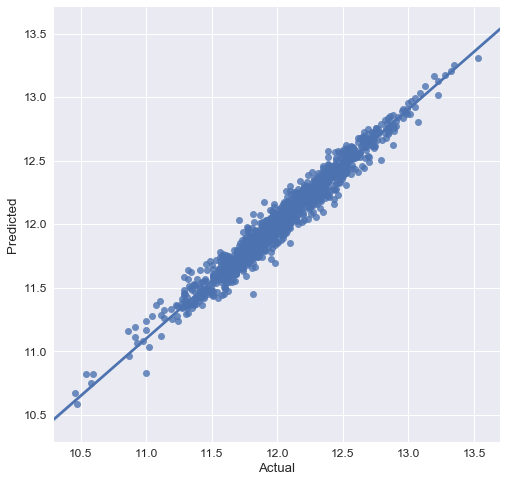

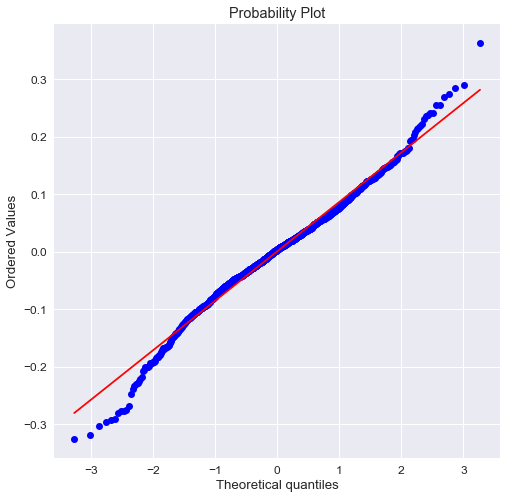

In [187]:
# The results are put in dataframe "predictions_xgb_train"

predictions_xgb_train = pd.DataFrame({"Predicted":model_xgb.predict(X_train_v), 
                                      "Actual":y_train_v});
predictions_xgb_train["Residual"] = predictions_xgb_train.Actual - predictions_xgb_train.Predicted;


print('*'*50)
print('XGBooster Training Performance: R^2 = {:.4f}'.format(R2(predictions_xgb_train.Predicted,
                                                              predictions_xgb_train.Actual)))
print('*'*50)
print('XGBooster Training Performance: RMSE = {:.4f}'.format(rmse(predictions_xgb_train.Actual,
                                                                 predictions_xgb_train.Predicted)))
print('*'*50) 

fig, ax = plt.subplots(figsize=(8,8));
sns.regplot(predictions_xgb_train.Actual, predictions_xgb_train.Predicted);
#ax.set_title('')

fig, ax = plt.subplots(figsize=(8,8));
stats.probplot(predictions_xgb_train.Residual, dist="norm", plot=pylab);
pylab.show();

**************************************************
XGBooster Test Performance: R^2 = 0.7138
**************************************************
XGBooster Test Performance: RMSE = 0.1939
**************************************************


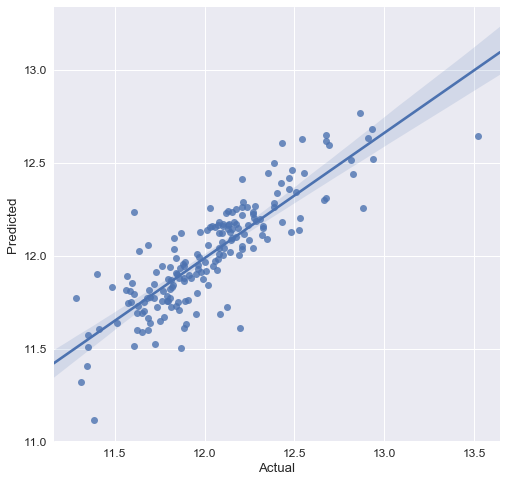

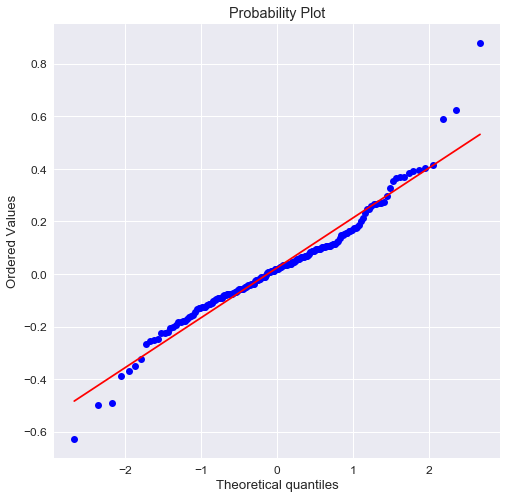

In [188]:
# Test Performance
# The results are put in dataframe "predictions_xgb_test"

predictions_xgb_test = pd.DataFrame({"Predicted":model_xgb.predict(X_test_v), 
                                      "Actual":y_test_v});
predictions_xgb_test["Residual"] = predictions_xgb_test.Actual - predictions_xgb_test.Predicted;


print('*'*50)
print('XGBooster Test Performance: R^2 = {:.4f}'.format(R2(predictions_xgb_test.Predicted,
                                                          predictions_xgb_test.Actual)))
print('*'*50)
print('XGBooster Test Performance: RMSE = {:.4f}'.format(rmse(predictions_xgb_test.Actual,
                                                             predictions_xgb_test.Predicted)))
print('*'*50)

fig, ax = plt.subplots(figsize=(8,8));
sns.regplot(predictions_xgb_test.Actual, predictions_xgb_test.Predicted);
#ax.set_title('')

fig, ax = plt.subplots(figsize=(8,8));
stats.probplot(predictions_xgb_test.Residual, dist="norm", plot=pylab);
pylab.show();

In [ ]:
# interpreting eigenmodes
component_results.iloc[3].sort_values()

In [ ]:
components = component_results.T.sort_values(by = 'Mode 2')

In [ ]:
components.drop(['Explained Variance'], inplace = True)

In [ ]:
components.iloc[:,1]

In [ ]:
round(sum(list(map(lambda x: x**2, components.iloc[:,0]))))